In [2]:
import pandas as pd 
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame()
df['AMBP3.SA'] = data.DataReader('AMBP3.SA', data_source='yahoo', start='1-1-2010')['Close']
df['MGLU3.SA'] = data.DataReader('MGLU3.SA', data_source='yahoo', start='1-1-2010')['Close']
df['XPML11.SA'] = data.DataReader('XPML11.SA', data_source='yahoo', start='1-1-2010')['Close']
df['ITUB4.SA'] = data.DataReader('ITUB4.SA', data_source='yahoo', start='1-1-2010')['Close']

df.head()

,AMBP3.SA,MGLU3.SA,XPML11.SA,ITUB4.SA
Date,,,,
2020-07-13,29.299999,20.125,103.449997,26.799999
2020-07-14,31.500000,20.125,103.000000,27.250000
2020-07-15,30.850000,20.375,102.400002,27.440001
2020-07-16,29.700001,20.045,100.680000,26.980000
2020-07-17,29.850000,20.500,100.949997,27.219999


In [4]:
# Retorno simples dos ativos
df.pct_change().head()

,AMBP3.SA,MGLU3.SA,XPML11.SA,ITUB4.SA
Date,,,,
2020-07-13,NaN,NaN,NaN,NaN
2020-07-14,0.075085,0.000000,-0.004350,0.016791
2020-07-15,-0.020635,0.012422,-0.005825,0.006972
2020-07-16,-0.037277,-0.016196,-0.016797,-0.016764
2020-07-17,0.005050,0.022699,0.002682,0.008895


In [5]:
r = df.pct_change() #retornos do ativo
w = [0.3, 0.3, 0.2, 0.2] #pesos
R = np.dot(r, w) #retorno do portfólio

In [6]:
vol = df.std()

In [7]:
# retorno simples 
r = df.pct_change()

# média dos retornos anualizados 
mean_returns = r.mean() * 252

# matriz de covariância 
covariance = np.cov(r[1:].T)

In [8]:
# Risco do portfólio anualizado
vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

AttributeError: 'list' object has no attribute 'T'

In [10]:
def generate_wallets(df_close, num_portfolios = 10000, risk_free = 0):
    # vetores de dados
    portfolio_weights = []
    portfolio_exp_returns = []
    portfolio_vol = []
    portfolio_sharpe = []

    # retorno simples 
    r = df.pct_change()
    mean_returns = r.mean() * 252

    # matriz de covariância 
    covariance = np.cov(r[1:].T)

    for i in range(num_portfolios):
        # gerando pesos aleatórios
        k = np.random.rand(len(df.columns))
        w = k / sum (k)

        # retorno
        R = np.dot(mean_returns, w)

        # risco
        vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

        # sharpe ratio
        sharpe = (R - risk_free)/vol

        portfolio_weights.append(w)
        portfolio_exp_returns.append(R)
        portfolio_vol.append(vol)
        portfolio_sharpe.append(sharpe)

    wallets = {'weights': portfolio_weights,
              'returns': portfolio_exp_returns,
              'vol':portfolio_vol,
              'sharpe': portfolio_sharpe}

    return wallets

In [11]:
def best_portfolio(wallets):
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    
    indice = np.array(sharpe).argmax()
        
    return weights[indice]

In [12]:
wallets = generate_wallets(df)
best_portfolio(wallets)

array([2.68771632e-01, 4.72061562e-05, 1.95801002e-01, 5.35380159e-01])

In [13]:
def plot_efficient_frontier(wallets):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    indice = np.array(sharpe).argmax()
    y_axis = returns[indice]
    X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()

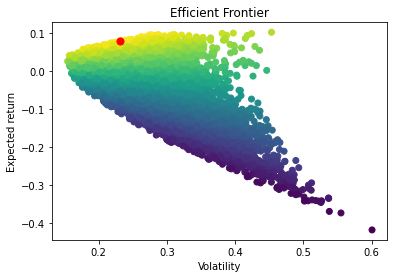

In [14]:
wallets = generate_wallets(df)
plot_efficient_frontier(wallets)

In [15]:
def best_portfolio(wallets, method = 'sharpe_ratio'):
    vol = wallets['vol']
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    returns = wallets['returns']
    
    if method == 'sharpe_ratio':

        indice = np.array(sharpe).argmax()

    elif method == 'volatility':

        indice = np.array(vol).argmin()

    elif method == 'return':

        indice = np.array(returns).argmax()

    return weights[indice]

In [16]:
def plot_efficient_frontier(wallets, method = 'sharpe_ratio'):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    if method == 'sharpe_ratio':

        indice = np.array(sharpe).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'volatility':

        indice = np.array(vol).argmin()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'return': 

        indice = np.array(returns).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Efficient Frontier")
    plt.xlabel("Volatility")
    plt.ylabel("Expected return")
    plt.show()

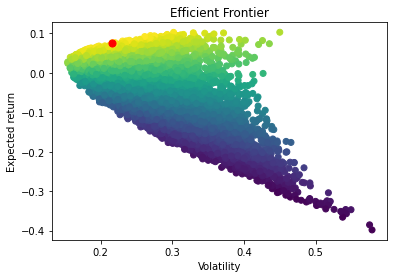

In [17]:
wallets = generate_wallets(df)
plot_efficient_frontier(wallets, method = 'sharpe_ratio')